##3 .Classifying movie reviews:
**a binary classification example**

Two-class classification, or binary classification, may be the most widely applied kind
of machine-learning problem. In this example, you’ll learn to classify movie reviews as
positive or negative, based on the text content of the reviews.

### 3.1 The IMBD dataset
* IMDB dataset: a set of 50,000 highly polarized reviews from the
Internet Movie Database. They’re split into 25,000 reviews for training and 25,000
reviews for testing, each set consisting of 50% negative and 50% positive reviews.
* IMDB dataset comes packaged with Keras. It has
already been preprocessed: the reviews (sequences of words) have been turned into
sequences of integers, where each integer stands for a specific word in a dictionary.

### 3.1.1  Loading the IMDB dataset

In [0]:
from keras.datasets import imdb

#keep the top 10,000 most frequently occurring words in the training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

* The argument num_words=10000 means you’ll only keep the top 10,000 most frequently
occurring words in the training data. Rare words will be discarded. This allows
you to work with vector data of manageable size.
* The variables train_data and test_data are lists of reviews; each review is a list of
word indices (encoding a sequence of words). train_labels and test_labels are
lists of 0s and 1s, where 0 stands for negative and 1 stands for positive:

In [0]:
print(train_data[0]) ## printing the 1 review in traing dataset

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [0]:
print(train_labels[0])## label of 1 review

1


In [0]:
## List comprehension gets the max of each review
# Finally we get the max of those max
max([max(sequences) for sequences in train_data])
  

9999

In [0]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

In [0]:
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## 3.2 Preparing the data

* You can’t feed lists of integers into a neural network. You have to turn your lists into tensors.
* We use One-hot encoding to convert the reviews into vectors of 0s and 1s, for instance, turning the sequence [3, 5] into a 10,000-dimensional vector that would be all 0s except for indices 3 and 5, which would be 1s.
* Then you could use as the first layer in your network a Dense layer, capable of handling floating-point vector data.

### 3.2.1 Encoding the integer sequences into a binary matrix

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))#Creates an all-zero matrix of shape (len(sequences),dimension)
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.#Sets specific indices of results[i] to 1s
  return results

In [0]:
x_train = vectorize_sequences(train_data)#Vectorized training data
x_test = vectorize_sequences(test_data)#Vectorized test data

In [0]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [0]:
#vectoris the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## 3.3 Building your network

### 3.3.1 The model definition

In [0]:
from keras import models
from keras import layers

In [0]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

### 3.3.2 Compiling the model

In [0]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

## 3.4 Validating your approach

In order to monitor during training the accuracy of the model on data it has never
seen before, you’ll create a validation set by setting apart 10,000 samples from the
original training data.

### 3.4.1 Setting aside a validation set

In [0]:
x_val=x_train[:10000]
partial_x_train=x_train[10000:]

In [0]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
print(x_val.shape,y_val.shape)
print(partial_x_train.shape,partial_y_train.shape)

(10000, 10000) (10000,)
(15000, 10000) (15000,)


### 3.4.2 Training your model

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.5425 - acc: 0.7755 - val_loss: 0.4062 - val_acc: 0.8625
Epoch 2/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.3249 - acc: 0.8963 - val_loss: 0.3290 - val_acc: 0.8717
Epoch 3/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.2367 - acc: 0.9230 - val_loss: 0.2857 - val_acc: 0.8880
Epoch 4/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.1853 - acc: 0.9399 - val_loss: 0.2737 - val_acc: 0.8908
Epoch 5/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1534 - acc: 0.9508 - val_loss: 0.2996 - val_acc: 0.8815
Epoch 6/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1239 - acc: 0.9616 - val_loss: 0.2869 - val_acc: 0.8867
Epoch 7/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1081 - acc: 0.9660 - val_loss: 0.3033 - 

15000/15000 [==============================] - 2s 117us/step - loss: 0.0708 - acc: 0.9819 - val_loss: 0.3390 - val_acc: 0.8811
Epoch 10/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0611 - acc: 0.9844 - val_loss: 0.3774 - val_acc: 0.8769
Epoch 11/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0482 - acc: 0.9890 - val_loss: 0.3916 - val_acc: 0.8741
Epoch 12/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.0399 - acc: 0.9918 - val_loss: 0.4159 - val_acc: 0.8750
Epoch 13/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0343 - acc: 0.9934 - val_loss: 0.4666 - val_acc: 0.8725
Epoch 14/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0258 - acc: 0.9949 - val_loss: 0.4988 - val_acc: 0.8709
Epoch 15/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0197 - acc: 0.9965 - val_loss: 0.5261 - val_acc: 0.8638
Epoch 16/20
15000/15000 [==============

15000/15000 [==============================] - 2s 117us/step - loss: 0.0112 - acc: 0.9986 - val_loss: 0.6023 - val_acc: 0.8642
Epoch 19/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.0066 - acc: 0.9996 - val_loss: 0.6552 - val_acc: 0.8650
Epoch 20/20
15000/15000 [==============================] - 2s 118us/step - loss: 0.0077 - acc: 0.9988 - val_loss: 0.6585 - val_acc: 0.8641


model.fit() returns a History object. This object has a member
history, which is a dictionary containing data about everything that happened
during training.

In [0]:
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

### 3.4.3 Plotting the training and validation loss

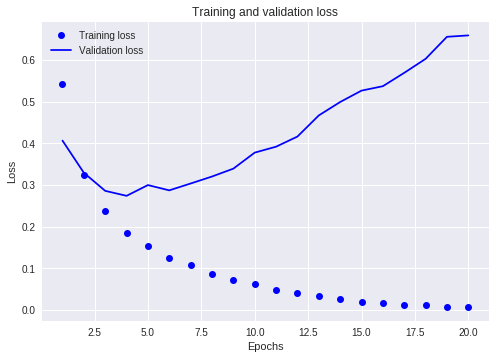

In [0]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']


epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 3.4.5 Plotting the training and validation accuracy

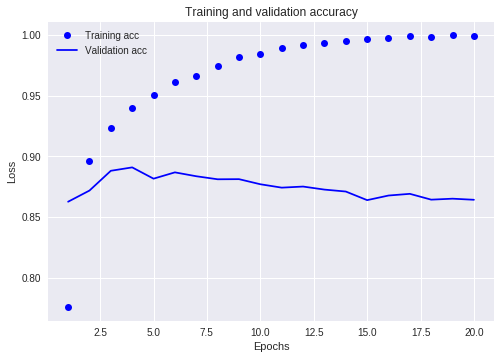

In [0]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. That’s what you would expect when running gradientdescent optimization—the quantity you’re trying to minimize should be less with every iteration. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is is overfitting: after the second epoch, you’re overoptimizing on the training data, and you end up learning representations that are specific to the training data and don’t generalize to data outside of the training set.

Let’s train a new network from scratch for four epochs and then evaluate it on the test data.

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 88us/step - loss: 0.4731 - acc: 0.8209
Epoch 2/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.2632 - acc: 0.9113
Epoch 3/4
25000/25000 [==============================] - 2s 86us/step - loss: 0.1991 - acc: 0.9305
Epoch 4/4
25000/25000 [==============================] - 2s 81us/step


In [0]:
results

[0.3303547314453125, 0.87004]

Thus we get 87% accuracy with a fairly naive approach

## 3.5 Using a trained network to generate predictions on new data

In [0]:
model.predict(x_test)

array([[0.1281182 ],
       [0.9997328 ],
       [0.25542396],
       ...,
       [0.07342929],
       [0.0448592 ],
       [0.4595468 ]], dtype=float32)

As you can see, the network is confident for some samples (0.99 or more, or 0.01 or
less) but less confident for others (0.6, 0.4).

# Building model with :-

* Trying only 1 hidden layer with 16 units
* Trying 3 hidden layers (each with 16 units)
* Trying 2 hidden layers each with 32 units
* Trying the same above architecture and replace relu activation by tanh activation in both the hidden layers

##  **1 ) Trying only 1 hidden layer with 16 units**

In [0]:
from keras.datasets import imdb

#keep the top 10,000 most frequently occurring words in the training data
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))#Creates an all-zero matrix of shape (len(sequences),dimension)
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.#Sets specific indices of results[i] to 1s
  return results

In [0]:
x_train = vectorize_sequences(train_data)#Vectorized training data
x_test = vectorize_sequences(test_data)#Vectorized test data

In [0]:
#vectoris the labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [0]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))#only one hidden layer
model.add(layers.Dense(1, activation='sigmoid'))


In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# create a validation set by setting apart 10,000 samples from the original training data.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 133us/step - loss: 0.4968 - acc: 0.7955 - val_loss: 0.3875 - val_acc: 0.8698
Epoch 2/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.3170 - acc: 0.9039 - val_loss: 0.3180 - val_acc: 0.8875
Epoch 3/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.2440 - acc: 0.9251 - val_loss: 0.2993 - val_acc: 0.8824
Epoch 4/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.2014 - acc: 0.9390 - val_loss: 0.2802 - val_acc: 0.8884
Epoch 5/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1712 - acc: 0.9503 - val_loss: 0.2762 - val_acc: 0.8870
Epoch 6/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1478 - acc: 0.9558 - val_loss: 0.2775 - val_acc: 0.8857
Epoch 7/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1297 - acc: 0.9629 - val_loss: 0.2790 - 

15000/15000 [==============================] - 2s 125us/step - loss: 0.1002 - acc: 0.9739 - val_loss: 0.3006 - val_acc: 0.8813
Epoch 10/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.0892 - acc: 0.9777 - val_loss: 0.3064 - val_acc: 0.8824
Epoch 11/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.0798 - acc: 0.9803 - val_loss: 0.3241 - val_acc: 0.8832
Epoch 12/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.0696 - acc: 0.9847 - val_loss: 0.3473 - val_acc: 0.8734
Epoch 13/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.0618 - acc: 0.9869 - val_loss: 0.3506 - val_acc: 0.8758
Epoch 14/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.0553 - acc: 0.9881 - val_loss: 0.3693 - val_acc: 0.8789
Epoch 15/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.0490 - acc: 0.9911 - val_loss: 0.3740 - val_acc: 0.8786
Epoch 16/20
15000/15000 [==============

15000/15000 [==============================] - 2s 121us/step - loss: 0.0331 - acc: 0.9951 - val_loss: 0.4312 - val_acc: 0.8716
Epoch 19/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.0295 - acc: 0.9952 - val_loss: 0.4458 - val_acc: 0.8696
Epoch 20/20
15000/15000 [==============================] - 2s 120us/step - loss: 0.0255 - acc: 0.9969 - val_loss: 0.4596 - val_acc: 0.8725


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

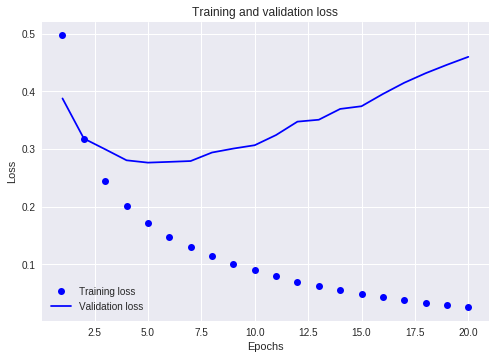

In [0]:
import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

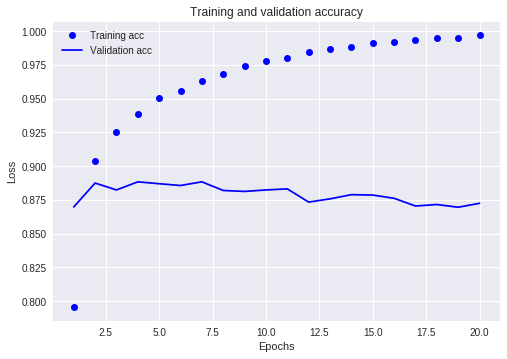

In [0]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/5
25000/25000 [==============================] - 2s 79us/step - loss: 0.4403 - acc: 0.8300
Epoch 2/5
25000/25000 [==============================] - 2s 83us/step - loss: 0.2702 - acc: 0.9103
Epoch 3/5
25000/25000 [==============================] - 2s 86us/step - loss: 0.2142 - acc: 0.9276
Epoch 4/5
25000/25000 [==============================] - 2s 84us/step - loss: 0.1832 - acc: 0.9369
Epoch 5/5
25000/25000 [==============================] - 2s 76us/step


In [0]:
results

[0.29386149538993833, 0.8816]

Thus we get 88.1% accuracy with a fairly naive approach

In [0]:
model.predict(x_test)

array([[0.20299584],
       [0.9999181 ],
       [0.69670904],
       ...,
       [0.11750636],
       [0.06967304],
       [0.55051583]], dtype=float32)

## **2) Trying 3 hidden layers (each with 16 units)**

In [0]:
model=models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))#1st hidden layer
model.add(layers.Dense(16, activation='relu'))#2st hidden layer
model.add(layers.Dense(16, activation='relu'))#3st hidden layer
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# create a validation set by setting apart 10,000 samples from the original training data.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/15
15000/15000 [==============================] - 2s 158us/step - loss: 0.5302 - acc: 0.7838 - val_loss: 0.3813 - val_acc: 0.8736
Epoch 2/15
15000/15000 [==============================] - 2s 126us/step - loss: 0.2982 - acc: 0.9017 - val_loss: 0.3011 - val_acc: 0.8856
Epoch 3/15
15000/15000 [==============================] - 2s 121us/step - loss: 0.2120 - acc: 0.9290 - val_loss: 0.3382 - val_acc: 0.8599
Epoch 4/15
15000/15000 [==============================] - 2s 120us/step - loss: 0.1673 - acc: 0.9422 - val_loss: 0.2761 - val_acc: 0.8889
Epoch 5/15
15000/15000 [==============================] - 2s 119us/step - loss: 0.1326 - acc: 0.9567 - val_loss: 0.3108 - val_acc: 0.8825
Epoch 6/15
15000/15000 [==============================] - 2s 121us/step - loss: 0.1062 - acc: 0.9665 - val_loss: 0.3073 - val_acc: 0.8846
Epoch 7/15
15000/15000 [==============================] - 2s 120us/step - loss: 0.0847 - acc: 0.9750 - val_loss: 0.3364 - 

15000/15000 [==============================] - 2s 117us/step - loss: 0.0506 - acc: 0.9862 - val_loss: 0.3928 - val_acc: 0.8779
Epoch 10/15
15000/15000 [==============================] - 2s 119us/step - loss: 0.0425 - acc: 0.9883 - val_loss: 0.5409 - val_acc: 0.8570
Epoch 11/15
15000/15000 [==============================] - 2s 122us/step - loss: 0.0309 - acc: 0.9928 - val_loss: 0.4863 - val_acc: 0.8703
Epoch 12/15
15000/15000 [==============================] - 2s 118us/step - loss: 0.0196 - acc: 0.9970 - val_loss: 0.5257 - val_acc: 0.8649
Epoch 13/15
15000/15000 [==============================] - 2s 118us/step - loss: 0.0210 - acc: 0.9955 - val_loss: 0.5257 - val_acc: 0.8727
Epoch 14/15
15000/15000 [==============================] - 2s 119us/step - loss: 0.0197 - acc: 0.9947 - val_loss: 0.5592 - val_acc: 0.8720
Epoch 15/15
15000/15000 [==============================] - 2s 119us/step - loss: 0.0074 - acc: 0.9996 - val_loss: 0.6180 - val_acc: 0.8646


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

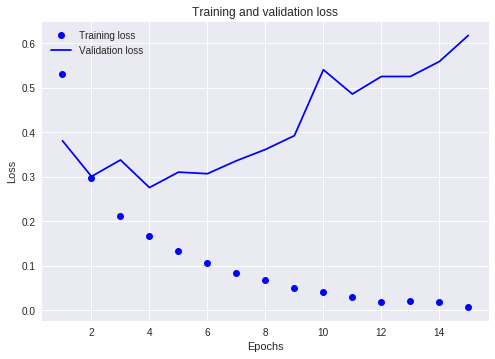

In [0]:
import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

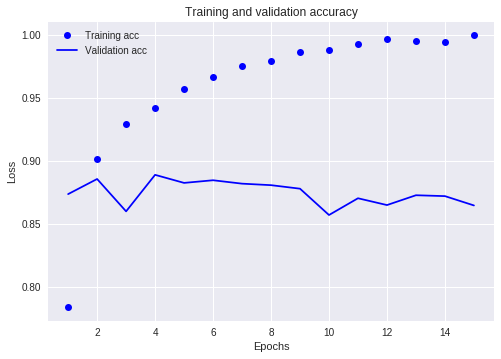

In [0]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))#1 hidden layer
model.add(layers.Dense(16, activation='relu'))#2 hidden layer
model.add(layers.Dense(16, activation='relu'))#3 hidden layer
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 3s 113us/step - loss: 0.4653 - acc: 0.8200
Epoch 2/4
25000/25000 [==============================] - 2s 89us/step - loss: 0.2573 - acc: 0.9105
Epoch 3/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.1960 - acc: 0.9285
Epoch 4/4
25000/25000 [==============================] - 2s 74us/step


In [0]:
results

[0.3121150800991058, 0.87976]

Thus we get 87.9% accuracy with a fairly naive approach

In [0]:
model.predict(x_test)

array([[0.30295524],
       [0.9999733 ],
       [0.95539063],
       ...,
       [0.14163104],
       [0.13014808],
       [0.85656714]], dtype=float32)

## **3) Trying 2 hidden layers each with 32 units**

In [0]:
model=models.Sequential()
model.add(layers.Dense(32,activation='relu',input_shape=(10000,)))#1st hidden layer
model.add(layers.Dense(32, activation='relu'))#2st hidden layer

model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=15,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/15
15000/15000 [==============================] - 2s 139us/step - loss: 0.4862 - acc: 0.7837 - val_loss: 0.3576 - val_acc: 0.8607
Epoch 2/15
15000/15000 [==============================] - 2s 139us/step - loss: 0.2761 - acc: 0.9055 - val_loss: 0.2913 - val_acc: 0.8862
Epoch 3/15
15000/15000 [==============================] - 2s 137us/step - loss: 0.1986 - acc: 0.9315 - val_loss: 0.3148 - val_acc: 0.8741
Epoch 4/15
15000/15000 [==============================] - 2s 138us/step - loss: 0.1560 - acc: 0.9470 - val_loss: 0.2776 - val_acc: 0.8894
Epoch 5/15
15000/15000 [==============================] - 2s 139us/step - loss: 0.1234 - acc: 0.9588 - val_loss: 0.2954 - val_acc: 0.8852
Epoch 6/15
15000/15000 [==============================] - 2s 137us/step - loss: 0.0972 - acc: 0.9687 - val_loss: 0.3291 - val_acc: 0.8823
Epoch 7/15
15000/15000 [==============================] - 2s 134us/step - loss: 0.0760 - acc: 0.9775 - val_loss: 0.3520 - 

Epoch 8/15
15000/15000 [==============================] - 2s 136us/step - loss: 0.0568 - acc: 0.9843 - val_loss: 0.3750 - val_acc: 0.8801
Epoch 9/15
15000/15000 [==============================] - 2s 139us/step - loss: 0.0427 - acc: 0.9887 - val_loss: 0.4044 - val_acc: 0.8765
Epoch 10/15
15000/15000 [==============================] - 2s 139us/step - loss: 0.0353 - acc: 0.9911 - val_loss: 0.4421 - val_acc: 0.8779
Epoch 11/15
15000/15000 [==============================] - 2s 139us/step - loss: 0.0329 - acc: 0.9903 - val_loss: 0.4692 - val_acc: 0.8772
Epoch 12/15
15000/15000 [==============================] - 2s 140us/step - loss: 0.0128 - acc: 0.9988 - val_loss: 0.5077 - val_acc: 0.8750
Epoch 13/15
15000/15000 [==============================] - 2s 141us/step - loss: 0.0181 - acc: 0.9953 - val_loss: 0.5388 - val_acc: 0.8719
Epoch 14/15
13824/15000 [==========================>...] - ETA: 0s - loss: 0.0059 - acc: 0.9998

15000/15000 [==============================] - 2s 139us/step - loss: 0.0061 - acc: 0.9997 - val_loss: 0.7652 - val_acc: 0.8472
Epoch 15/15
15000/15000 [==============================] - 2s 138us/step - loss: 0.0119 - acc: 0.9971 - val_loss: 0.5987 - val_acc: 0.8703


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

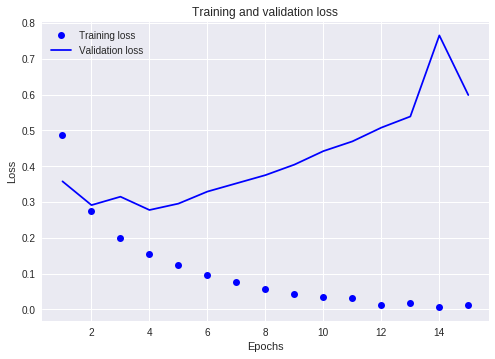

In [0]:
import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

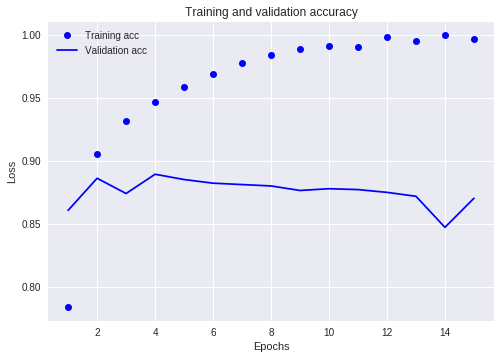

In [0]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))#1 hidden layer
model.add(layers.Dense(32, activation='relu'))#2 hidden layer
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 94us/step - loss: 0.4381 - acc: 0.8153
Epoch 2/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.2456 - acc: 0.9098
Epoch 3/4
25000/25000 [==============================] - 3s 104us/step - loss: 0.1908 - acc: 0.9299
Epoch 4/4
25000/25000 [==============================] - 2s 96us/step


In [0]:
results

[0.3430902758026123, 0.868]

Thus we get 86.8% accuracy with a fairly naive approach

In [0]:
model.predict(x_test)

array([[0.10854351],
       [0.999962  ],
       [0.39847773],
       ...,
       [0.07631421],
       [0.04508728],
       [0.4307484 ]], dtype=float32)

## **4) Trying the same above architecture and replace relu activation by tanh activation in both the hidden layers**

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

In [0]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [0]:
# create a validation set by setting apart 10,000 samples from the original training data.
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [0]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 168us/step - loss: 0.4769 - acc: 0.7962 - val_loss: 0.3531 - val_acc: 0.8744
Epoch 2/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.2748 - acc: 0.9091 - val_loss: 0.2842 - val_acc: 0.8891
Epoch 3/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1918 - acc: 0.9362 - val_loss: 0.2976 - val_acc: 0.8784
Epoch 4/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.1480 - acc: 0.9504 - val_loss: 0.2872 - val_acc: 0.8853
Epoch 5/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1134 - acc: 0.9627 - val_loss: 0.3119 - val_acc: 0.8811
Epoch 6/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.0873 - acc: 0.9708 - val_loss: 0.3948 - val_acc: 0.8657
Epoch 7/20
15000/15000 [==============================] - 2s 121us/step - loss: 0.0706 - acc: 0.9763 - val_loss: 0.3817 - 

15000/15000 [==============================] - 2s 123us/step - loss: 0.0386 - acc: 0.9890 - val_loss: 0.4907 - val_acc: 0.8636
Epoch 10/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.0338 - acc: 0.9901 - val_loss: 0.5111 - val_acc: 0.8733
Epoch 11/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.0279 - acc: 0.9918 - val_loss: 0.5473 - val_acc: 0.8715
Epoch 12/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.0111 - acc: 0.9984 - val_loss: 0.6368 - val_acc: 0.8552
Epoch 13/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.0217 - acc: 0.9936 - val_loss: 0.6260 - val_acc: 0.8670
Epoch 14/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.0180 - acc: 0.9951 - val_loss: 0.6928 - val_acc: 0.8636
Epoch 15/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.0037 - acc: 0.9998 - val_loss: 0.6893 - val_acc: 0.8642
Epoch 16/20
15000/15000 [==============

15000/15000 [==============================] - 2s 122us/step - loss: 0.0011 - acc: 0.9999 - val_loss: 0.7931 - val_acc: 0.8584
Epoch 19/20
15000/15000 [==============================] - 2s 122us/step - loss: 6.1314e-04 - acc: 1.0000 - val_loss: 0.8820 - val_acc: 0.8526
Epoch 20/20
15000/15000 [==============================] - 2s 122us/step - loss: 0.0225 - acc: 0.9944 - val_loss: 0.8747 - val_acc: 0.8610


In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

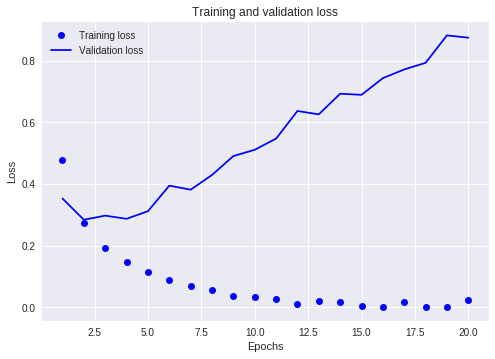

In [0]:
import matplotlib.pyplot as plt

train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

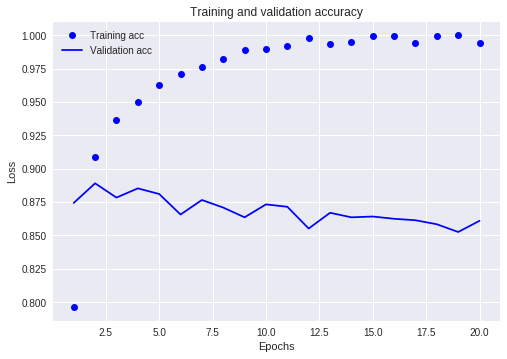

In [0]:
train_acc = history_dict['acc']
val_acc = history_dict['val_acc']
plt.plot(epochs, train_acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
model = models.Sequential()
model.add(layers.Dense(16, activation='tanh', input_shape=(10000,)))
model.add(layers.Dense(16, activation='tanh'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/2
25000/25000 [==============================] - 3s 105us/step - loss: 0.4248 - acc: 0.8301
Epoch 2/2
25000/25000 [==============================] - 2s 78us/step


In [0]:
results

[0.2776307820415497, 0.88808]

In [0]:
model.predict(x_test)

array([[0.22858872],
       [0.99043536],
       [0.801407  ],
       ...,
       [0.09745014],
       [0.13444334],
       [0.59008265]], dtype=float32)